# Competi 3
### En este cuaderno vamos a practicar la técnica de embedding sobre una columna de un dataset para predecir la esperanza de vida

### Imports necesarios

In [297]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

## 1. Importamos los datos desde Kaggle

In [298]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

#!pip install kagglehub[pandas-datasets]
# Set the path to the file you'd like to load
file_path = "Life Expectancy Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kumarajarshi/life-expectancy-who",
  file_path,
)

display("Primeros 5 registros:", df.head())

'Primeros 5 registros:'

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [300]:
df["Life expectancy "].describe()

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64

## 2. Análisis de la calidad de los datos

#### Vamos a usar esta función para ver la información de cada columna

In [301]:
# En primer lugar vamos definir una función que nos ayudará a analizar las columnas de un dataframe
def describe_columna(df, col):
    print(f'Columna: {col}  -  Tipo de datos: {df[col].dtype}')
    print(f'Número de valores nulos: {df[col].isnull().sum()}  -  Número de valores distintos: {df[col].nunique()}')
    print('Valores más frecuentes:')
    for i, v in df[col].value_counts().iloc[:10].items() :
        print(i, ':',v, "veces")

### 2.1 Columna Country

In [302]:
describe_columna(df, "Country")

Columna: Country  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 193
Valores más frecuentes:
Afghanistan : 16 veces
Peru : 16 veces
Nicaragua : 16 veces
Niger : 16 veces
Nigeria : 16 veces
Norway : 16 veces
Oman : 16 veces
Pakistan : 16 veces
Panama : 16 veces
Papua New Guinea : 16 veces


#### Vemos que hay 193 paises distintos y que generalmente vamos a tener de estos paises 16 registros para cada uno, por año

### 2.2 Columna Life expectancy (borrar esos 10 registros)

In [303]:
describe_columna(df, "Life expectancy ")

Columna: Life expectancy   -  Tipo de datos: float64
Número de valores nulos: 10  -  Número de valores distintos: 362
Valores más frecuentes:
73.0 : 45 veces
75.0 : 33 veces
78.0 : 31 veces
73.6 : 28 veces
73.9 : 25 veces
81.0 : 25 veces
76.0 : 25 veces
74.5 : 24 veces
74.7 : 24 veces
73.2 : 23 veces


#### Vamos a borrar los 10 valores nulos porque es nuestra variable objetiva

### 2.3 Columna Year

In [304]:
describe_columna(df, "Year")

Columna: Year  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 16
Valores más frecuentes:
2013 : 193 veces
2015 : 183 veces
2014 : 183 veces
2012 : 183 veces
2011 : 183 veces
2010 : 183 veces
2009 : 183 veces
2008 : 183 veces
2007 : 183 veces
2006 : 183 veces


#### Están todos los datos, no haremos nada

### 2.4 Columna Adult Mortality (media de esos paises 2 años antes y después para rellenar 2013)

In [305]:
describe_columna(df, "Adult Mortality")

Columna: Adult Mortality  -  Tipo de datos: float64
Número de valores nulos: 10  -  Número de valores distintos: 425
Valores más frecuentes:
12.0 : 34 veces
14.0 : 30 veces
16.0 : 29 veces
11.0 : 25 veces
138.0 : 25 veces
19.0 : 23 veces
144.0 : 22 veces
13.0 : 21 veces
17.0 : 21 veces
15.0 : 21 veces


#### Vamos a ver los casos de esos 10 valores nulos por si podriamos hacer algo con ellos

In [306]:
df[df['Adult Mortality'].isnull()].head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,82.8,0,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,58.4,0,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,81.6,0,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,NaN,0,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,87.3,0,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,77.3,0,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,83.3,0,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,5.2,0,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,NaN,0,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,79.3,0,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


#### Parece que es en el año 2013, como los años están entre 2000 y 2015, aplicaremos la media por pais en esos casos fijándonos solo en dos años atras (2011 y 2012) y dos años adelante (2014 y 2015)

### 2.5 Columna infant deaths

In [307]:
describe_columna(df, "infant deaths")

Columna: infant deaths  -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 209
Valores más frecuentes:
0 : 848 veces
1 : 342 veces
2 : 203 veces
3 : 175 veces
4 : 96 veces
8 : 57 veces
7 : 53 veces
9 : 48 veces
10 : 48 veces
6 : 46 veces


#### No hay nulos, no haremos nada con esta columna

### 2.6 Columna Alcohol (PROGRESION PARA 2015 con los 15 años anteriores) (QUE HACER CON SOUTH SUDAN)

In [308]:
describe_columna(df, "Alcohol")

Columna: Alcohol  -  Tipo de datos: float64
Número de valores nulos: 194  -  Número de valores distintos: 1076
Valores más frecuentes:
0.01 : 288 veces
0.03 : 15 veces
0.04 : 13 veces
0.02 : 12 veces
0.09 : 12 veces
1.18 : 10 veces
0.06 : 10 veces
0.21 : 10 veces
0.54 : 9 veces
0.08 : 9 veces


In [309]:
# Filtrar filas con valores nulos en Alcohol
nulos = df[df["Alcohol"].isnull()]

# Agrupar por país y contar los nulos, asegurando el orden de las columnas
nulos_por_pais = nulos.groupby("Country").agg(
    Años=("Year", lambda x: ", ".join(map(str, sorted(x.unique())))),  # Lista de años únicos ordenados
    Nulos=("Year", "count")  # Contar los nulos
).reset_index()

# Mostrar la lista completa sin cortes
pd.set_option("display.max_rows", None)  # Evita que la tabla se corte
display(nulos_por_pais)

,Country,Años,Nulos
0,Algeria,2015,1
1,Angola,2015,1
2,Antigua and Barbuda,2015,1
3,Argentina,2015,1
4,Armenia,2015,1
5,Australia,2015,1
6,Austria,2015,1
7,Azerbaijan,2015,1
8,Bahamas,2015,1
9,Bahrain,2015,1


####  Aqui, para los paises con Alcohol nulos en 2015, por cada pais de esa lista, como tenemos registros desde los años 2000 hasta 2015 podriamos estudiar la progresión y estimar un numero para cada pais, menos para Montenegro que tiene nulo en 2005 y tampoco aplicarlo para South Sudan que le faltan los 16 años de la columna Alcohol

### 2.7 Columna percentage expenditure

In [310]:
describe_columna(df, "percentage expenditure")

Columna: percentage expenditure  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 2328
Valores más frecuentes:
0.0 : 611 veces
71.27962362 : 1 veces
3.304039899 : 1 veces
218.5716179 : 1 veces
36.81621175 : 1 veces
2.542436908 : 1 veces
2.092343893 : 1 veces
22.35595448 : 1 veces
15.25518816 : 1 veces
31.50243237 : 1 veces


### 2.8 Columna Hepatitis B (553 NULOS)

In [311]:
describe_columna(df, "Hepatitis B")

Columna: Hepatitis B  -  Tipo de datos: float64
Número de valores nulos: 553  -  Número de valores distintos: 87
Valores más frecuentes:
99.0 : 240 veces
98.0 : 210 veces
96.0 : 167 veces
97.0 : 155 veces
95.0 : 149 veces
94.0 : 127 veces
93.0 : 101 veces
92.0 : 92 veces
91.0 : 75 veces
89.0 : 71 veces


### 2.9 Columna Measles

In [312]:
describe_columna(df, "Measles ")

Columna: Measles   -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 958
Valores más frecuentes:
0 : 983 veces
1 : 104 veces
2 : 68 veces
3 : 44 veces
4 : 33 veces
6 : 29 veces
7 : 28 veces
5 : 25 veces
8 : 24 veces
9 : 22 veces


### 2.10 Columna under-five deaths 

In [313]:
describe_columna(df, "under-five deaths ")

Columna: under-five deaths   -  Tipo de datos: int64
Número de valores nulos: 0  -  Número de valores distintos: 252
Valores más frecuentes:
0 : 785 veces
1 : 361 veces
2 : 163 veces
4 : 161 veces
3 : 129 veces
12 : 53 veces
8 : 49 veces
6 : 48 veces
10 : 47 veces
5 : 44 veces


### 2.11 Columna Polio (19 NULOS)

In [314]:
describe_columna(df, "Polio")

Columna: Polio  -  Tipo de datos: float64
Número de valores nulos: 19  -  Número de valores distintos: 73
Valores más frecuentes:
99.0 : 376 veces
98.0 : 255 veces
96.0 : 207 veces
97.0 : 205 veces
95.0 : 180 veces
94.0 : 159 veces
93.0 : 120 veces
92.0 : 96 veces
91.0 : 88 veces
9.0 : 71 veces


### 2.12 Columna Total expenditure (226 NULOS)

In [315]:
describe_columna(df, "Total expenditure")

Columna: Total expenditure  -  Tipo de datos: float64
Número de valores nulos: 226  -  Número de valores distintos: 818
Valores más frecuentes:
4.6 : 15 veces
6.7 : 12 veces
5.6 : 11 veces
9.1 : 10 veces
3.4 : 10 veces
5.64 : 10 veces
5.9 : 10 veces
5.25 : 10 veces
5.3 : 10 veces
5.92 : 9 veces


### 2.13 Columna Diphtheria (19 NULOS)

In [316]:
describe_columna(df, "Diphtheria ")

Columna: Diphtheria   -  Tipo de datos: float64
Número de valores nulos: 19  -  Número de valores distintos: 81
Valores más frecuentes:
99.0 : 350 veces
98.0 : 254 veces
97.0 : 205 veces
96.0 : 201 veces
95.0 : 200 veces
94.0 : 149 veces
93.0 : 120 veces
92.0 : 100 veces
91.0 : 91 veces
89.0 : 76 veces


### 2.14 Columna  HIV/AIDS

In [317]:
describe_columna(df, " HIV/AIDS")

Columna:  HIV/AIDS  -  Tipo de datos: float64
Número de valores nulos: 0  -  Número de valores distintos: 200
Valores más frecuentes:
0.1 : 1781 veces
0.2 : 124 veces
0.3 : 115 veces
0.4 : 69 veces
0.5 : 42 veces
0.6 : 35 veces
0.9 : 32 veces
0.8 : 32 veces
0.7 : 29 veces
1.5 : 21 veces


### 2.15 Columna GDP

In [318]:
describe_columna(df, "GDP")

Columna: GDP  -  Tipo de datos: float64
Número de valores nulos: 448  -  Número de valores distintos: 2490
Valores más frecuentes:
584.25921 : 1 veces
354.8185998 : 1 veces
358.99731 : 1 veces
43.646498 : 1 veces
416.14838 : 1 veces
391.515524 : 1 veces
375.5819866 : 1 veces
348.151511 : 1 veces
341.2894618 : 1 veces
292.55962 : 1 veces


### 2.16 Columna Population (652 NULOS)

In [319]:
describe_columna(df, "Population")

Columna: Population  -  Tipo de datos: float64
Número de valores nulos: 652  -  Número de valores distintos: 2278
Valores más frecuentes:
444.0 : 4 veces
292.0 : 2 veces
127445.0 : 2 veces
26868.0 : 2 veces
1141.0 : 2 veces
718239.0 : 2 veces
17182933.0 : 1 veces
1764652.0 : 1 veces
181181744.0 : 1 veces
11352973.0 : 1 veces


### 2.17 Columna  thinness  1-19 years (34 NULOS)

In [320]:
describe_columna(df, " thinness  1-19 years")

Columna:  thinness  1-19 years  -  Tipo de datos: float64
Número de valores nulos: 34  -  Número de valores distintos: 200
Valores más frecuentes:
1.0 : 74 veces
1.9 : 65 veces
0.8 : 64 veces
0.7 : 63 veces
1.2 : 62 veces
2.1 : 61 veces
1.5 : 60 veces
2.2 : 58 veces
2.0 : 57 veces
0.9 : 57 veces


### 2.18 Columna  thinness 5-9 years (34 NULOS)

In [321]:
describe_columna(df, " thinness 5-9 years")

Columna:  thinness 5-9 years  -  Tipo de datos: float64
Número de valores nulos: 34  -  Número de valores distintos: 207
Valores más frecuentes:
0.9 : 69 veces
1.1 : 67 veces
0.5 : 63 veces
1.9 : 63 veces
1.0 : 62 veces
2.1 : 61 veces
1.3 : 59 veces
1.5 : 57 veces
1.7 : 55 veces
0.6 : 54 veces


### 2.19 Columna Income composition of resources (167 NULOS)

In [322]:
describe_columna(df, "Income composition of resources")

Columna: Income composition of resources  -  Tipo de datos: float64
Número de valores nulos: 167  -  Número de valores distintos: 625
Valores más frecuentes:
0.0 : 130 veces
0.7 : 17 veces
0.739 : 13 veces
0.714 : 12 veces
0.636 : 12 veces
0.797 : 11 veces
0.734 : 11 veces
0.703 : 11 veces
0.686 : 11 veces
0.86 : 11 veces


### 2.20 Columna Schooling (163 NULOS)

In [323]:
describe_columna(df, "Schooling")

Columna: Schooling  -  Tipo de datos: float64
Número de valores nulos: 163  -  Número de valores distintos: 173
Valores más frecuentes:
12.9 : 58 veces
13.3 : 52 veces
12.5 : 49 veces
12.8 : 46 veces
12.3 : 44 veces
12.6 : 43 veces
12.4 : 42 veces
11.9 : 41 veces
10.7 : 41 veces
11.7 : 40 veces


### 2.21 Columna Status

In [324]:
describe_columna(df, "Status")

Columna: Status  -  Tipo de datos: object
Número de valores nulos: 0  -  Número de valores distintos: 2
Valores más frecuentes:
Developing : 2426 veces
Developed : 512 veces


### 2.22 Columna BMI (34 NULOS)

In [325]:
describe_columna(df, " BMI ")

Columna:  BMI   -  Tipo de datos: float64
Número de valores nulos: 34  -  Número de valores distintos: 608
Valores más frecuentes:
58.5 : 18 veces
55.8 : 16 veces
57.0 : 16 veces
54.2 : 15 veces
59.9 : 15 veces
59.3 : 14 veces
55.0 : 13 veces
59.4 : 13 veces
58.1 : 13 veces
52.8 : 13 veces


## 3. Preprocesado de los datos

#### Copiamos el dataset para hacer cambios y no modificar el original

In [326]:
df_encoded = df.copy()

### 3.1 Columna Life expectancy (Borraremos los nulos)

In [327]:
df_encoded = df_encoded.dropna(subset=["Life expectancy "])
print("Nulos: ",df_encoded["Life expectancy "].isnull().sum())

Nulos:  0


### 3.2 Columna Adult Mortality (aplicaremos la media con dos años atras y adelante de 2013)

In [328]:
# Paso 1: Identificar los países con Adult Mortality nulo en 2013
paises_nulos_2013 = df_encoded[(df_encoded['Year'] == 2013) & (df_encoded['Adult Mortality'].isna())]['Country'].unique()

# Paso 2 y 3: Para cada país, calcular la media de los años 2011, 2012, 2014, 2015 y rellenar en 2013
for pais in paises_nulos_2013:
    # Filtrar los datos del país en los años 2011, 2012, 2014, 2015
    datos_pais = df_encoded[(df_encoded['Country'] == pais) & (df_encoded['Year'].isin([2011, 2012, 2014, 2015]))]
    
    # Calcular la media de Adult Mortality en esos años
    media_pais = datos_pais['Adult Mortality'].mean()
    
    # Rellenar los valores nulos en 2013 con la media calculada
    df_encoded.loc[(df_encoded['Country'] == pais) & (df_encoded['Year'] == 2013) & (df_encoded['Adult Mortality'].isna()), 'Adult Mortality'] = media_pais

# Verificamos si aún quedan valores nulos en 2013
print("Nulos: ",df_encoded[(df_encoded['Year'] == 2013) & (df_encoded['Adult Mortality'].isna())])

Nulos:  Empty DataFrame
Columns: [Country, Year, Status, Life expectancy , Adult Mortality, infant deaths, Alcohol, percentage expenditure, Hepatitis B, Measles ,  BMI , under-five deaths , Polio, Total expenditure, Diphtheria ,  HIV/AIDS, GDP, Population,  thinness  1-19 years,  thinness 5-9 years, Income composition of resources, Schooling]
Index: []


### 3.3 Columna Alcohol (progresión para rellenar el año 2015) (QUE HACER CON SOUTH SUDAN)

In [329]:
# Filtrar países con Alcohol nulo en 2015
paises_nulos_2015 = df_encoded[(df_encoded["Year"] == 2015) & (df_encoded["Alcohol"].isnull())]["Country"].unique()

 #print(paises_nulos_2015)  # países afectados

In [330]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar datos de países con nulos en 2015 (excluyendo South Sudan)
paises_a_estimar = [pais for pais in paises_nulos_2015 if pais not in ["South Sudan"]]

for pais in paises_a_estimar:
    # Filtrar datos del país entre 2000 y 2014 (años donde sí hay datos)
    datos_pais = df_encoded[(df_encoded["Country"] == pais) & 
                            (df_encoded["Year"] < 2015) & 
                            df_encoded["Alcohol"].notnull()]

    if len(datos_pais) >= 2:  # Necesitamos al menos 2 puntos para estimar la tendencia
        X = datos_pais["Year"].values.reshape(-1, 1)  # Años como variable independiente
        y = datos_pais["Alcohol"].values  # Consumo de alcohol como variable dependiente

        # Ajustar un modelo de regresión lineal
        modelo = LinearRegression()
        modelo.fit(X, y)

        # Predecir el valor de 2015
        valor_estimado = modelo.predict(np.array([[2015]]))[0]

        # Forzar un mínimo de 0.01 (si es negativo o muy bajo)
        valor_estimado = max(valor_estimado, 0.01)

        # Asignar el valor estimado en el DataFrame
        df_encoded.loc[(df_encoded["Country"] == pais) & (df_encoded["Year"] == 2015), "Alcohol"] = valor_estimado

In [331]:
# Verificar que se estimaron los valores
display(df_encoded[df_encoded["Year"] == 2015][["Country", "Alcohol"]])

,Country,Alcohol
0,Afghanistan,0.010000
16,Albania,4.600000
32,Algeria,0.480952
48,Angola,9.793238
64,Antigua and Barbuda,8.617333
80,Argentina,8.348095
96,Armenia,4.350381
112,Australia,10.275905
128,Austria,11.833714
144,Azerbaijan,1.434000


### 3.x  Columna Status (Aplicamos One-Hot Encoding)

In [332]:
# Crear el codificador
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar One-Hot Encoding
encoded_array = encoder.fit_transform(df_encoded[['Status']])

# Convertir a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['Status']))

# Concatenar con el DataFrame original
df_encoded = pd.concat([df_encoded.drop(columns=['Status']), encoded_df], axis=1)

# Mostrar el resultado
df_encoded["Status_Developing"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Status_Developing, dtype: float64

In [333]:
df_encoded.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1.0
1,Afghanistan,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1.0
2,Afghanistan,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1.0
3,Afghanistan,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.0
4,Afghanistan,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.0


#### Vamos a crear solo 1 columna con el one-hot encoding, porque con solo 1 columna tendremos la informacion de Developed o Developing de cada registro

In [334]:
#df_encoded["Country"].unique().sum()

### 3.x Columna Country (Aplicamos Embeding) SIN HIPERPARAMETROS

In [ ]:
import keras_tuner as kt
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
import numpy as np
from sklearn.preprocessing import StandardScaler

# Eliminar filas con valores nulos
df_encoded.dropna(inplace=True)

# Establecer una semilla global para reproducibilidad
seed_value = 5
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

#  Definir las columnas numéricas correctamente
numerical_columns = [col for col in df_encoded.columns if col not in ['Life expectancy ', 'Country']]

# Verificar que 'numerical_columns' se define correctamente
print("Columnas numéricas:", numerical_columns)

# Función para construir el modelo, donde únicamente se ajusta el embedding para la columna 'Country'
def build_model(hp):
    
    # Definir la columna categórica 'Country' y las columnas numéricas
    categorical_column = 'Country'
    
    # Definir entradas para el modelo
    input_country = Input(shape=(1,), name=categorical_column)
    input_numerical = Input(shape=(len(numerical_columns),), name="numerical_input")
    
    # Crear embedding para la columna 'Country', ajustando solo la dimensión de salida (output_dim)
    embedding_dim = hp.Int('embedding_dim', min_value=4, max_value=50, step=2)
    embedding_country = Embedding(input_dim=num_countries + 1, output_dim=embedding_dim, name="emb_Country")(input_country)
    flattened_embedding = Flatten()(embedding_country)
    
    # Concatenar el embedding con las variables numéricas
    concatenated = Concatenate()([flattened_embedding, input_numerical])

    # Arquitectura fija para el resto del modelo
    x = Dense(64, activation='relu')(concatenated)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='relu')(x)
    output = Dense(1, activation='linear', name="output_layer")(x)

    # Definir y compilar el modelo con parámetros fijos
    model = Model(inputs=[input_country, input_numerical], outputs=output)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='mse',
        metrics=['mae']
    )

    return model

# Crear el tuner, donde solo se busca la mejor dimensión para el embedding de 'Country'
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=80,
    executions_per_trial=2,
    directory='my_dir',
    project_name='embedding_country',
    seed=5
)

# Preparamos las entradas del modelo

# Convertir la columna categórica 'Country' a códigos numéricos
df_encoded["Country"] = df_encoded["Country"].astype('category')
df_encoded["Country_codes"] = df_encoded["Country"].cat.codes
num_countries = df_encoded["Country_codes"].nunique()

# Convertir la columna 'Country' y las columnas numéricas a matrices numpy
X_country = df_encoded["Country_codes"].values
X_numerical = df_encoded[numerical_columns].values

# **Escalar las columnas numéricas**
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Preparamos la salida
y = df_encoded['Life expectancy '].values

# **Dividir en conjunto de entrenamiento y prueba (80% train, 20% test)**
X_train_country, X_test_country, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_country, X_numerical_scaled, y, test_size=0.2, random_state=seed_value
)

# Definir callback de EarlyStopping
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Ejecutar la búsqueda de hiperparámetros con EarlyStopping
tuner.search(
    [X_train_country, X_train_num], y_train,
    epochs=150,
    validation_data=([X_test_country, X_test_num], y_test),
    callbacks=[early_stop],
    verbose=1
)

# Obtener los mejores hiperparámetros encontrados
best_hps = tuner.get_best_hyperparameters()[0]
print(f"🔹 Mejores hiperparámetros (solo embeddings): {best_hps.values}")

Trial 22 Complete [00h 00m 06s]
val_mae: 3.1885637044906616

Best val_mae So Far: 2.522786021232605
Total elapsed time: 00h 01m 52s
🔹 Mejores hiperparámetros (solo embeddings): {'embedding_dim': 50}


In [ ]:
# Creamos el modelo final con los mejores hiperparámetros
seed_value = 5
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

model_keras = tuner.hypermodel.build(best_hps)

# Entrenamos el modelo final
history = model_keras.fit(
    [X_train_country, X_train_num], y_train,
    epochs=150,
    validation_data=([X_test_country, X_test_num], y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4631.2021 - mae: 67.4840 - val_loss: 4272.8848 - val_mae: 64.7919
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3844.3909 - mae: 61.3526 - val_loss: 2589.8901 - val_mae: 50.0716
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1804.0896 - mae: 40.4849 - val_loss: 251.9015 - val_mae: 13.3808
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 159.1068 - mae: 10.0533 - val_loss: 59.8048 - val_mae: 5.7855
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.5598 - mae: 6.8232 - val_loss: 39.2531 - val_mae: 4.6033
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 62.1739 - mae: 6.2324 - val_loss: 31.3562 - val_mae: 4.1551
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.6217 - mae: 6.2412 - val_loss: 26.9834 - val_mae: 3.8435
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48.2266 - mae: 5.4704 - val_loss: 25.3541 - val_mae: 3.8250
Epoch 9/150
41/41 ━━━━━━━━━━━

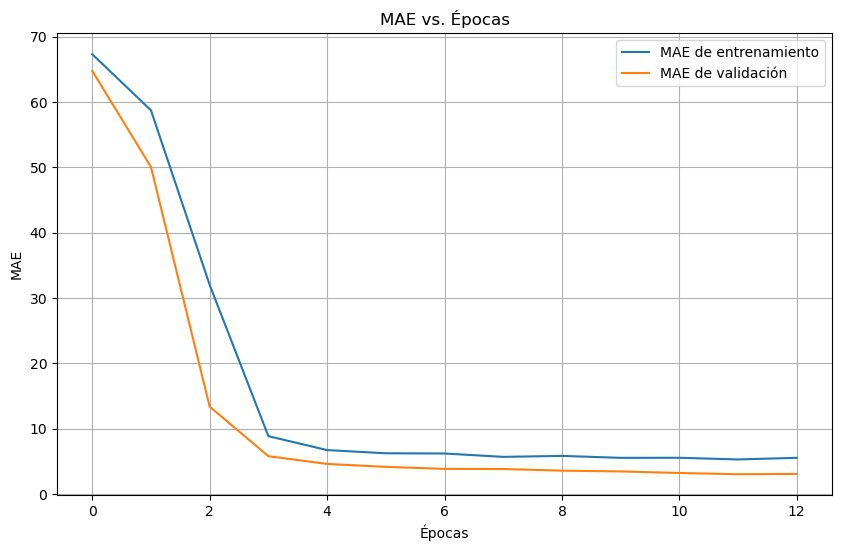

In [ ]:
# Graficamos el MAE de entrenamiento y el MAE de validación por época
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('MAE vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

### 3.x Columna Country (Aplicamos Embeding) CON HIPERPARAMETROS

In [345]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, Embedding, Flatten, Concatenate, BatchNormalization, Activation, LeakyReLU
)
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Eliminar filas con valores nulos
df_encoded.dropna(inplace=True)

# Establecer una semilla global para reproducibilidad
seed_value = 5
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

# Definir columnas numéricas
numerical_columns = [col for col in df_encoded.columns if col not in ['Life expectancy ', 'Country']]

# Convertir la columna categórica 'Country' a códigos numéricos
df_encoded["Country"] = df_encoded["Country"].astype('category')
df_encoded["Country_codes"] = df_encoded["Country"].cat.codes
num_countries = df_encoded["Country_codes"].nunique()

# Convertir a matrices numpy
X_country = df_encoded["Country_codes"].values
X_numerical = df_encoded[numerical_columns].values

# Escalar las columnas numéricas
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)

# Preparar la salida
y = df_encoded['Life expectancy '].values

# Dividir en entrenamiento y prueba
X_train_country, X_test_country, X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_country, X_numerical_scaled, y, test_size=0.2, random_state=seed_value
)

# Función para construir el modelo con búsqueda de hiperparámetros
def build_model(hp):
    input_country = Input(shape=(1,), name='Country')
    input_numerical = Input(shape=(len(numerical_columns),), name='numerical_input')
    
    # Hiperparámetro para la dimensión del embedding
    embedding_dim = hp.Int('embedding_dim', min_value=4, max_value=50, step=2)
    embedding_country = Embedding(input_dim=num_countries + 1, output_dim=embedding_dim, name="emb_Country")(input_country)
    flattened_embedding = Flatten()(embedding_country)
    
    # Concatenar el embedding con las variables numéricas
    concatenated = Concatenate()([flattened_embedding, input_numerical])
    
    # Hiperparámetro para el número de capas ocultas
    num_layers = hp.Int('num_layers', min_value=1, max_value=4, step=1)
    
    # Hiperparámetro para la función de activación
    activation_fn = hp.Choice('activation_fn', values=['relu', 'tanh', 'leaky_relu', 'elu'])
    
    # Hiperparámetro para la regularización L2
    l2_reg = hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='LOG')
    
    # Hiperparámetro para Batch Normalization (activado/desactivado)
    use_batch_norm = hp.Boolean('use_batch_norm')
    
    x = concatenated
    for i in range(num_layers):
        units = hp.Int(f'units_layer_{i}', min_value=32, max_value=256, step=32)
        dropout_rate = hp.Float(f'dropout_layer_{i}', min_value=0.1, max_value=0.5, step=0.1)
        
        x = Dense(units, activation=None, kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x)
        
        # Aplicar Batch Normalization si se elige
        if use_batch_norm:
            x = BatchNormalization()(x)
        
        # Aplicar la activación seleccionada
        if activation_fn == 'leaky_relu':
            x = LeakyReLU()(x)
        else:
            x = Activation(activation_fn)(x)
        
        x = Dropout(dropout_rate)(x)
    
    output = Dense(1, activation='linear', name='output_layer')(x)
    
    # Hiperparámetros para optimizador y tasa de aprendizaje
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
    
    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)
    
    model = Model(inputs=[input_country, input_numerical], outputs=output)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    return model

# Crear el tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=80,
    executions_per_trial=2,
    directory='my_dir_hiper',
    project_name='full_hyperparameter_tuning',
    seed=5
)

# Callback de EarlyStopping
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Ejecutar la búsqueda
tuner.search(
    [X_train_country, X_train_num], y_train,
    epochs=150,
    validation_data=([X_test_country, X_test_num], y_test),
    callbacks=[early_stop],
    batch_size=32,  # Se usa un valor fijo aquí porque el batch_size se optimiza dentro de la búsqueda
    verbose=1
)

# Obtener mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters()[0]
print(f"🔹 Mejores hiperparámetros: {best_hps.values}")

Trial 69 Complete [00h 00m 32s]
val_mae: 3.4580036401748657

Best val_mae So Far: 1.5078415870666504
Total elapsed time: 00h 17m 42s

Search: Running Trial #70

Value             |Best Value So Far |Hyperparameter
42                |32                |embedding_dim
4                 |1                 |num_layers
tanh              |leaky_relu        |activation_fn
1.7898e-05        |0.00014384        |l2_reg
False             |False             |use_batch_norm
192               |160               |units_layer_0
0.2               |0.3               |dropout_layer_0
rmsprop           |adam              |optimizer
0.00031552        |0.00021249        |learning_rate
256               |96                |units_layer_1
0.4               |0.3               |dropout_layer_1
256               |96                |units_layer_2
0.3               |0.5               |dropout_layer_2
32                |160               |units_layer_3
0.2               |0.1               |dropout_layer_3

Epoch 1/15

KeyboardInterrupt: 

In [340]:
# Creamos el modelo final con los mejores hiperparámetros
seed_value = 5
np.random.seed(seed_value)
random.seed(seed_value)
tf.random.set_seed(seed_value)

model_keras = tuner.hypermodel.build(best_hps)

# Entrenamos el modelo final
history = model_keras.fit(
    [X_train_country, X_train_num], y_train,
    epochs=150,
    validation_data=([X_test_country, X_test_num], y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2184.3240 - mae: 40.3885 - val_loss: 1583.2352 - val_mae: 37.2928
Epoch 2/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 796.7559 - mae: 23.4038 - val_loss: 184.6083 - val_mae: 11.5028
Epoch 3/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.9221 - mae: 10.0243 - val_loss: 213.1109 - val_mae: 12.7865
Epoch 4/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 87.4786 - mae: 7.0855 - val_loss: 21.0302 - val_mae: 3.5669
Epoch 5/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 43.4370 - mae: 5.1625 - val_loss: 13.1372 - val_mae: 2.6975
Epoch 6/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42.9981 - mae: 5.0738 - val_loss: 130.8194 - val_mae: 10.0377
Epoch 7/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 49.3171 - mae: 5.3986 - val_loss: 17.9726 - val_mae: 3.3742
Epoch 8/150
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.2164 - mae: 4.6393 - val_loss: 10.1543 - val_mae: 2.2164
Epoch 9/150
41/41 ━━━━━━━━━━━━━━

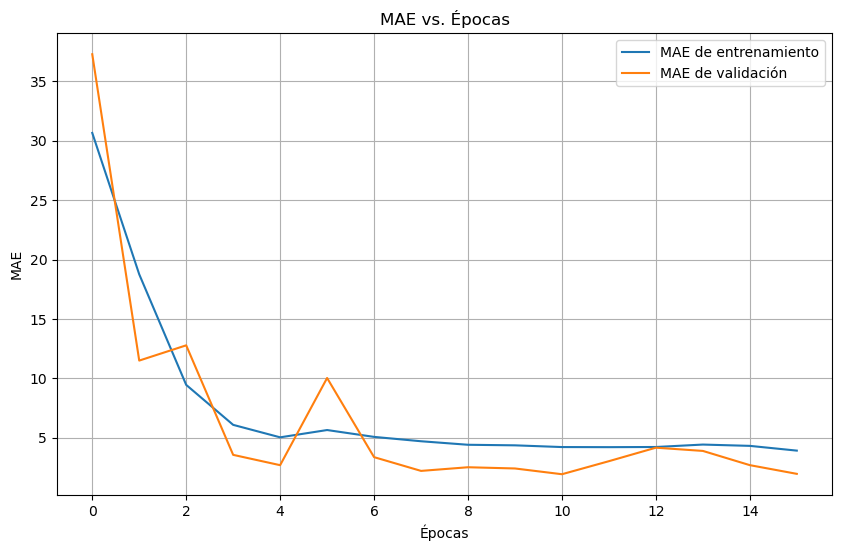

In [341]:
# Graficamos el MAE de entrenamiento y el MAE de validación por época
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='MAE de entrenamiento')
plt.plot(history.history['val_mae'], label='MAE de validación')
plt.title('MAE vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

### 1231321